## 1. 엔드투엔드 예제 : 텐서플로우로 선형 분류기 만들기

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 1. 샘플 만들기
- 평균, 공분산 행렬

In [6]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
												 mean = [0, 3],
												 cov = [[1, 0.5], [0.5, 1]],
												 size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
												 mean = [3, 0],
												 cov = [[1, 0.5], [0.5, 1]],
												 size = num_samples_per_class
)

# (1000, 2)인 2개의 샘플들을 수직 연결
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# 타깃 레이블 생성
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
					np.ones((num_samples_per_class, 1), dtype = "float32")
					))

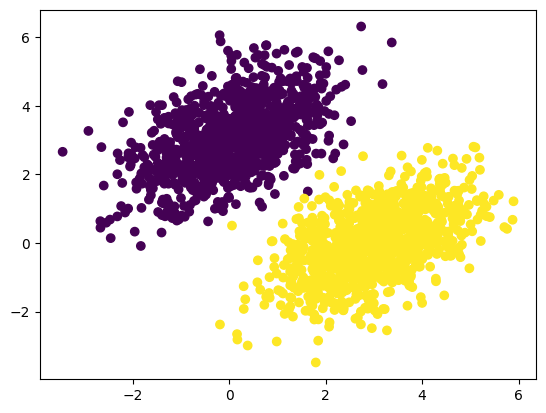

In [7]:
# 시각화
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])
plt.show()

### 2. 선형 분류기

0번째 손실 : 0.3280
1번째 손실 : 0.0885
2번째 손실 : 0.0718
3번째 손실 : 0.0659
4번째 손실 : 0.0620
5번째 손실 : 0.0587
6번째 손실 : 0.0558
7번째 손실 : 0.0531
8번째 손실 : 0.0506
9번째 손실 : 0.0484
10번째 손실 : 0.0463
11번째 손실 : 0.0445
12번째 손실 : 0.0428
13번째 손실 : 0.0412
14번째 손실 : 0.0398
15번째 손실 : 0.0385
16번째 손실 : 0.0373
17번째 손실 : 0.0362
18번째 손실 : 0.0352
19번째 손실 : 0.0343
20번째 손실 : 0.0335
21번째 손실 : 0.0328
22번째 손실 : 0.0321
23번째 손실 : 0.0315
24번째 손실 : 0.0309
25번째 손실 : 0.0304
26번째 손실 : 0.0299
27번째 손실 : 0.0294
28번째 손실 : 0.0291
29번째 손실 : 0.0287
30번째 손실 : 0.0284
31번째 손실 : 0.0281
32번째 손실 : 0.0278
33번째 손실 : 0.0275
34번째 손실 : 0.0273
35번째 손실 : 0.0271
36번째 손실 : 0.0269
37번째 손실 : 0.0267
38번째 손실 : 0.0266
39번째 손실 : 0.0264


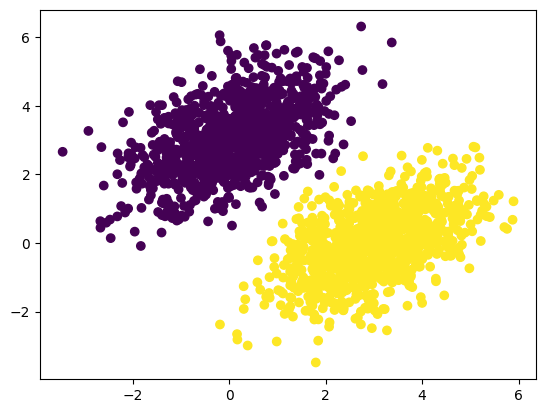

In [11]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))

def model(inputs):
	return tf.matmul(inputs, W) + b

# 손실함수
def square_loss(targets, predictions):
	per_sample_losses = tf.square(targets - predictions)
	return tf.reduce_mean(per_sample_losses) # 샘플 당 손실값을 1개의 손실값으로 평균함

lr = 0.1

def training_step(inputs, targets):
	with tf.GradientTape() as tape:
		predictions = model(inputs)
		loss = square_loss(targets, predictions)
	grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
	W.assign_sub(grad_loss_wrt_W * lr)
	b.assign_sub(grad_loss_wrt_b * lr)
	return loss

# 전체 데이터 사용
# 미니배치 대비 실행 시간이 오래 걸리나 손실 감소에 더 효율적이고, 학습률을 크게 할 수 있음
for step in range(40):
	loss = training_step(inputs, targets)
	print(f"{step}번째 손실 : {loss:.4f}")


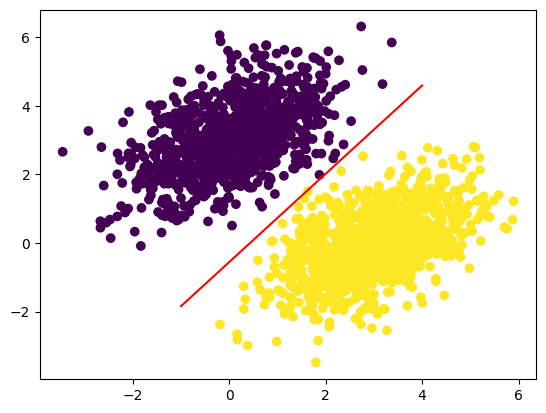

In [12]:
# 예측 & 시각화
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
# 직선 긋기
x = np.linspace(-1, 4, 100) # -1 ~ 4 사이에 100개의 숫자 생성. 간격 일정함
y = -W[0] / W[1] * x + (0.5 - b) / W[1] # 직선의 방정식
plt.plot(x, y, "-r")
plt.show()